In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Carregar dados
df = pd.read_csv("../datasets/diabetes Pima Indian heritage.csv")

#Exibir dados
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

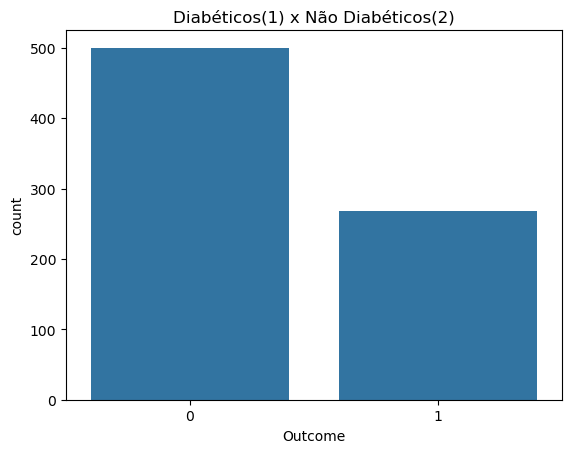

In [103]:
# OU df['Outcome'].value_counts()
sns.countplot(data=df, x="Outcome")
plt.title("Diabéticos(1) x Não Diabéticos(2)")
plt.show

Gerando gráfico de Pregnancies...


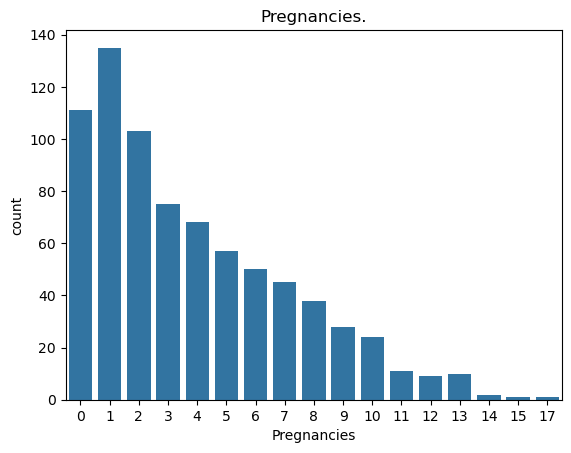

Gerando gráfico de Glucose...


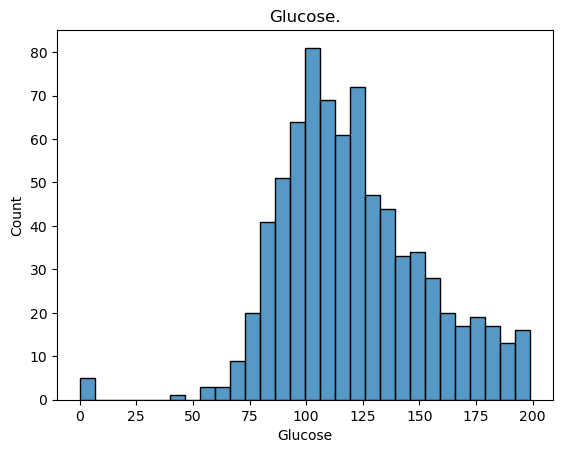

Gerando gráfico de BloodPressure...


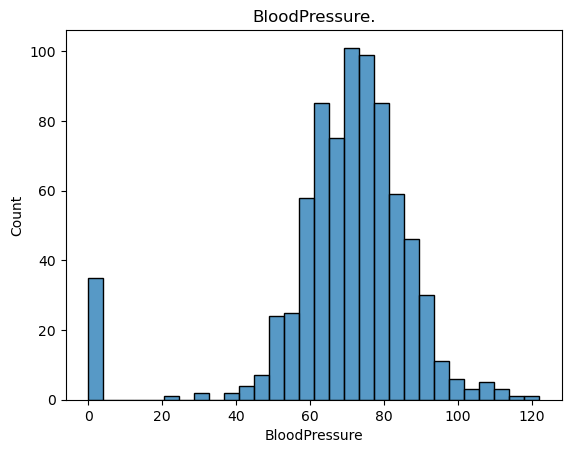

Gerando gráfico de SkinThickness...


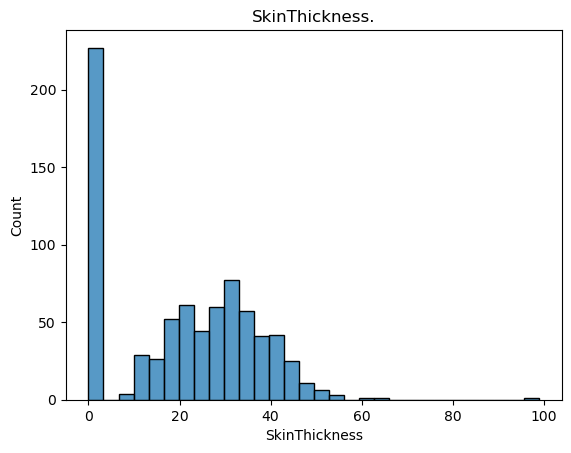

Gerando gráfico de Insulin...


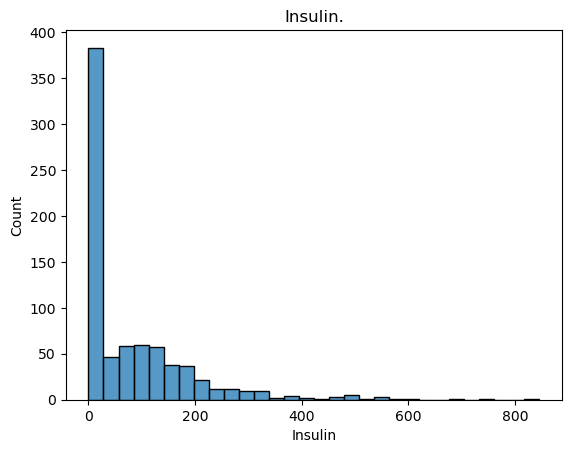

Gerando gráfico de BMI...


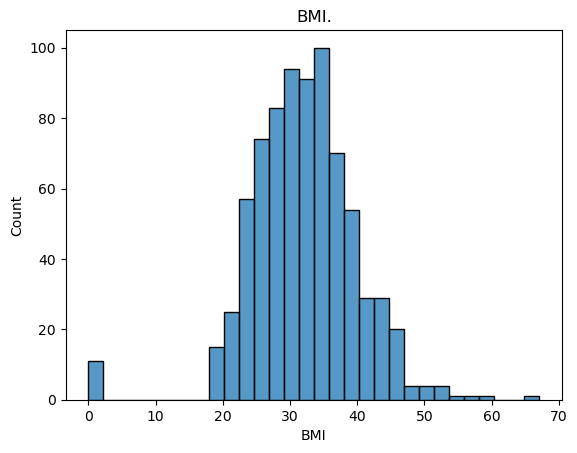

Gerando gráfico de DiabetesPedigreeFunction...


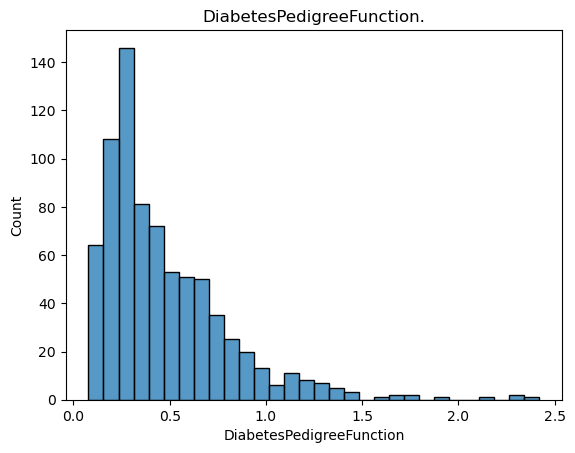

Gerando gráfico de Age...


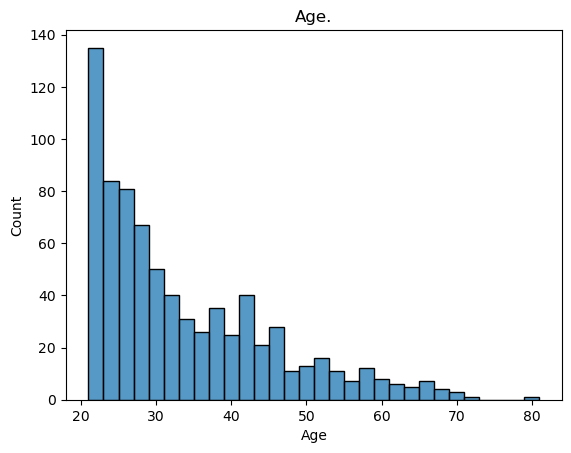

Gerando gráfico de Outcome...


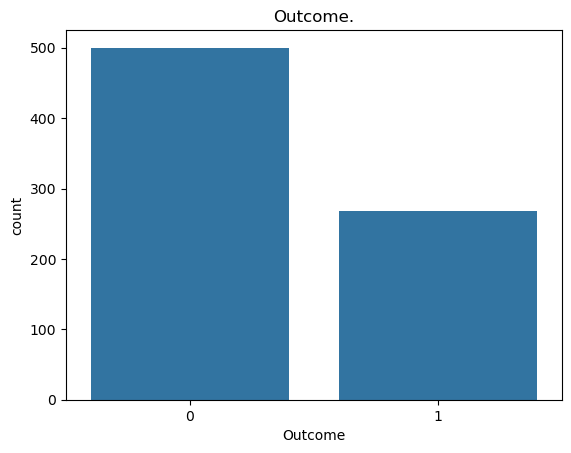

In [104]:
#A maioria das características são melhores visualizadas no histogramas
def graficos (dados):
    for coluna in dados.columns:
        if coluna == "Outcome" or coluna == "Pregnancies":
            sns.countplot(data=dados, x=coluna)
            plt.title(f"{coluna}.")
            print(f"Gerando gráfico de {coluna}...")
            plt.show()
        else:
            sns.histplot(x=coluna, data=dados, bins=30)
            plt.title(f"{coluna}.")
            print(f"Gerando gráfico de {coluna}...")
            plt.show()
    return

graficos(df)

As variáveis tem muitos valores nulos, especialmente insulina. Ao pesquisar sobre a relação entre esses variáveis, duas chamam mais atenção:
1. Insulina x Idade
Com o aumento da idade, a tendência é que o corpo fique menos sensível a insulina, ou seja, a insulina não consegue agir para levar glicose para dentro das células, fazendo com que mais glicose fique acumulada no sangue, surgindo diabets.

fonte: https://araujo.com.br/blog/insulina/

2. SkinThickness x BMI
SkinThickness é a gordura debaixo da pele e BMI é o índice de massa corporal, é lógico supor que quanto mais gordura mais massa a pessoa possui.

Nos Gráfico de correlação abaixo é possível perceber que relamente a correlação é forte e direta, quanto mais massa, mais cordura e maior a concentração de diabetes. Já no caso da idade, os casos de diabete tendem a se concetrar em valores onde a insulina chega em 150 para cima e a idade perto de 30 para cima. Pessoas mais jovens apesar de ter insulina alta não tendem a ter diabets, o que mostra que só a idade não explica se a pesoa tem ou não a doença.

Como gordura é parte do peso, vou remover a coluna gordura. No caso da idade e insulina, não variáveis parte da outra, mas quando as duas crescem, influenciam diretamente na chance de ter diabets, logo vou fazer imputação via KNN Imputer. e o resto na mediana.

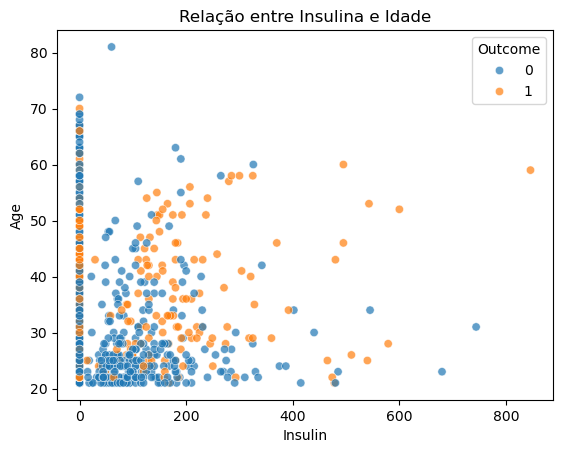

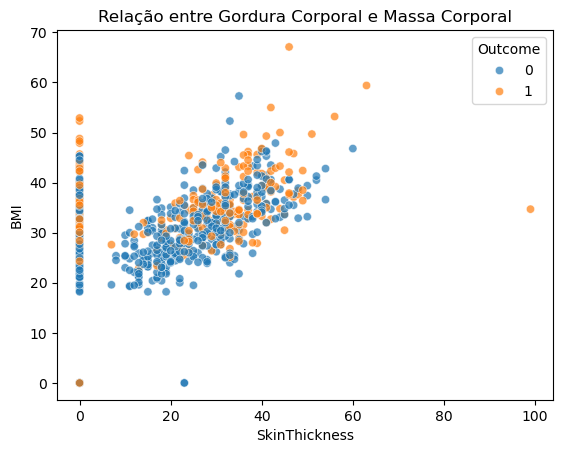

In [105]:
#Correlação entre as variáveis
sns.scatterplot(data=df, y='Age', x='Insulin', hue='Outcome', alpha=0.7)
plt.title("Relação entre Insulina e Idade")
plt.show()

sns.scatterplot(data=df, x='SkinThickness', y='BMI', hue='Outcome', alpha=0.7)
plt.title("Relação entre Gordura Corporal e Massa Corporal")
plt.show()


In [106]:
#Remoção da coluna SkinTickness
df_processado = df.drop(columns="SkinThickness")

#Convertendo todos os 0 em NaN para não afetar cálculos estatísticos:
colunas_alterar = ['Insulin', 'Age', 'BMI', 'DiabetesPedigreeFunction', 'BloodPressure', 'Glucose']
df_processado[colunas_alterar] = df_processado[colunas_alterar].replace(0, np.nan)

#Dividindo os dados e balanceando amostras para evitar vazamento da imputação:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Separar as classes
df_class_0 = df_processado[df_processado['Outcome'] == 0]
df_class_1 = df_processado[df_processado['Outcome'] == 1]

# Oversampling da classe 1
df_class_1_upsampled = resample(df_class_1,
                                n_samples=len(df_class_0),
                                replace=True,
                                random_state=42)

# Combinar
df_balanced = pd.concat([df_class_0, df_class_1_upsampled])

# Separar X e y
X = df_balanced.drop('Outcome', axis=1)
y = df_balanced['Outcome']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

#Fazendo Imputação KNN
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

imputer_knn = KNNImputer(n_neighbors=3)
imputer_median = SimpleImputer(strategy='median')
imputer_mean = SimpleImputer(strategy='mean')

imputadores = {
    'imput_knn':imputer_knn, 
    'imput_median':imputer_median, 
    'imput_mean':imputer_mean
    }

def imputar (X_test, X_train, y_test, y_train):
    for nome, imputador in imputadores.items():
        X_train_imput = imputador.fit_transform(X_train)
        X_test_imput = imputador.transform(X_test)

        df_X_train_imput = pd.DataFrame(X_train_imput, columns=X.columns)
        df_X_train_imput.to_csv(f"../datasets/df_X_train_{nome}.csv", index=False)

        df_X_test_imput = pd.DataFrame(X_test_imput, columns=X.columns)
        df_X_test_imput.to_csv(f"../datasets/df_X_test_{nome}.csv", index=False)

        df_y_train_imput = pd.DataFrame(y_train, columns=["Outcome"])
        df_y_train_imput.to_csv(f"../datasets/df_y_train_{nome}.csv", index=False)

        df_y_test_imput = pd.DataFrame(y_test, columns=["Outcome"])
        df_y_test_imput.to_csv(f"../datasets/df_y_test_{nome}.csv", index=False)
    return

imputar(X_test, X_train, y_test, y_train)

Gerando gráfico de Pregnancies...


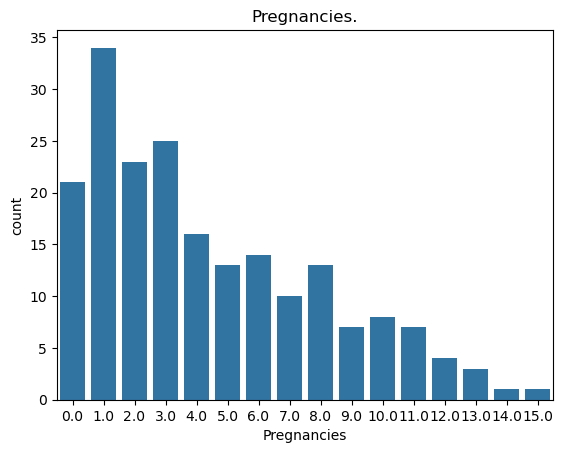

Gerando gráfico de Glucose...


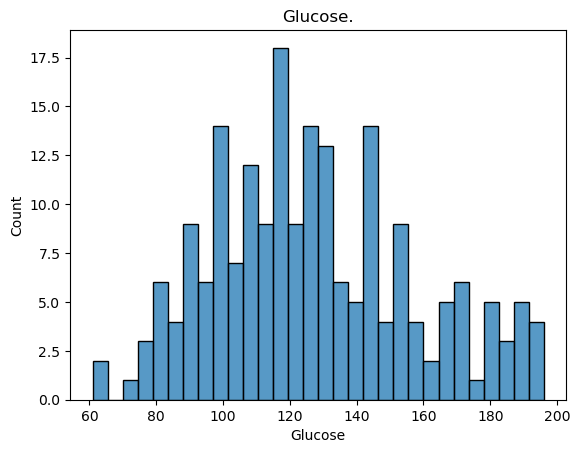

Gerando gráfico de BloodPressure...


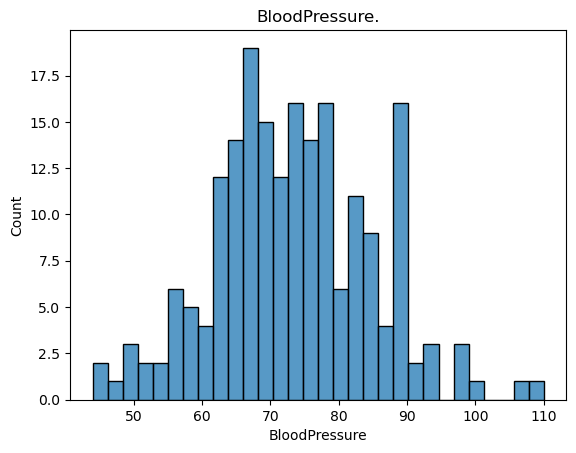

Gerando gráfico de Insulin...


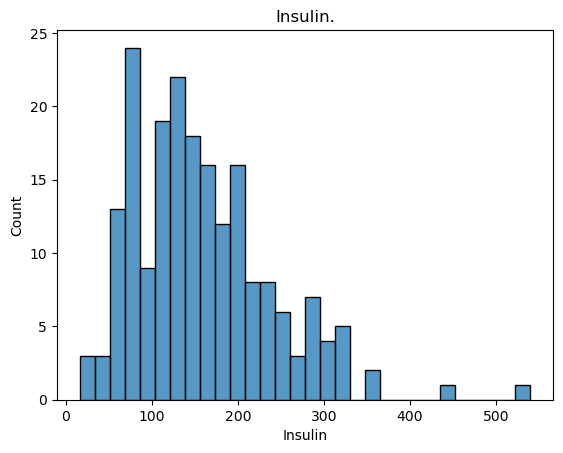

Gerando gráfico de BMI...


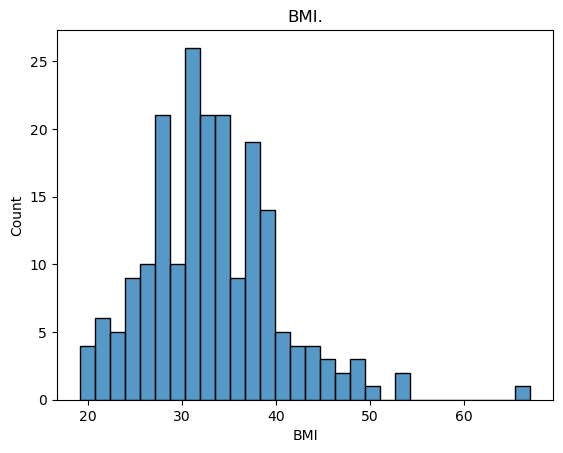

Gerando gráfico de DiabetesPedigreeFunction...


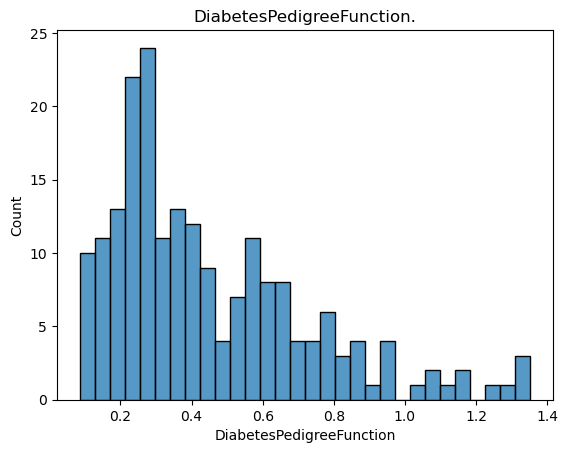

Gerando gráfico de Age...


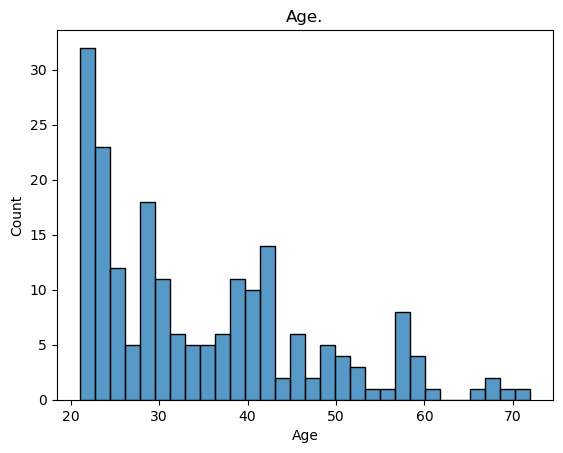

Gerando gráfico de Pregnancies...


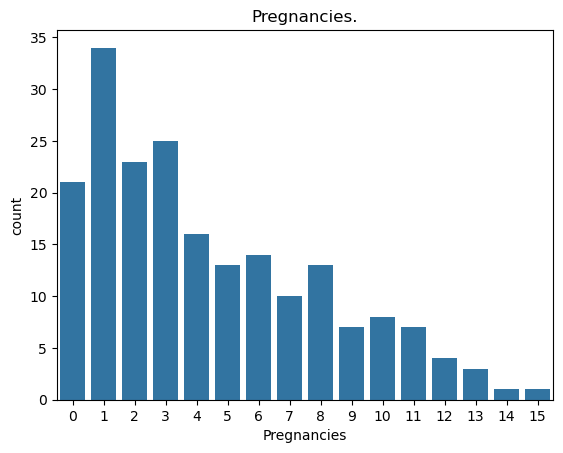

ValueError: cannot reindex on an axis with duplicate labels

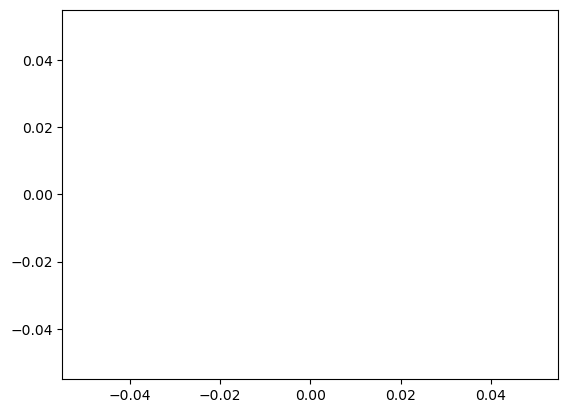

In [107]:
#Gerando gráficos Comparativos
graficos(pd.read_csv("../datasets/df_X_train_imput_knn.csv"))
graficos(X_train)